In [17]:
import numpy as np
import pandas as pd
import scipy.interpolate as inter
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy import signal
from scipy import constants
import scipy.optimize as opt


In [18]:
def url(path):
    path = 'https://gitlab.com/xmoskala/labdata/-/raw/main/doubleslitlab'+path
    path = path.replace(" ", "%20")
    return path

def fix(data):
    data[0] = data[0].map(lambda x : int(x.strip("b").strip("'").strip("\\r")))
    data[1] = data[1].map(lambda x : int(x.strip("b").strip("'")))
    return data.rename(columns={0:"?",1:"count",2:"distance"}).to_numpy().T

def dist(data):
    return np.arange(data[2].min(),data[2].max(),0.1)

def res(data):
    res = []
    for i in data[2]:
        res.append(np.mean(data[1, np.where(data[2]==i)]))
    return res
    
    
ds1 = fix(pd.read_csv(url("/dstrial1_12_1_22.csv"),header=None))
ds2 = fix(pd.read_csv(url("/dstrial1concat_12_6_22.csv"),header=None))
ssr = fix(pd.read_csv(url("/dstrial2_12_6_22.csv"),header=None))
ssl = fix(pd.read_csv(url("/dstrial3_12_6_22.csv"),header=None))
ps = fix(pd.read_csv(url("/counttrial1.csv"),header=None))


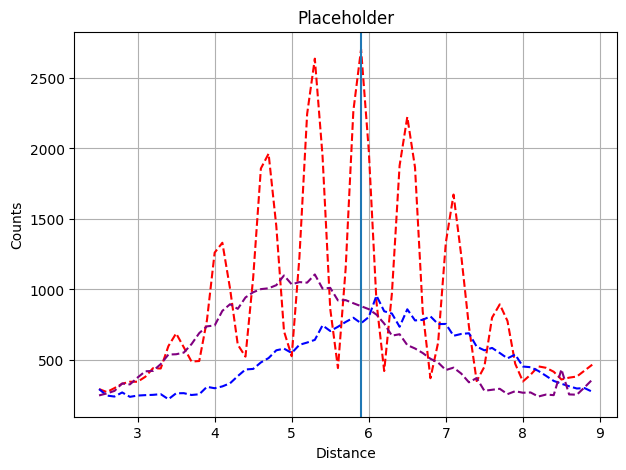

In [19]:
fig = plt.figure(figsize=[7,5])
ax = plt.subplot(111)
plt.plot(dist(ds1), res(ds1), color='red', ls='--')
#plt.plot(dist(ds2), res(ds2), color='orange', ls='--')
plt.plot(dist(ssr), res(ssr), color='blue', ls='--')
plt.plot(dist(ssl), res(ssl), color='purple', ls='--')
ax.axvline(5.9)
ax.set_ylabel('Counts')
ax.set_xlabel('Distance')
ax.set_title('Placeholder')

# set the limits
#ax.set_ylim(0, 13)
#ax.set_xlim(0, 15)

ax.grid('on')
plt.show()

(array([ 10.,  25.,  61., 132., 154., 186., 181., 109.,  73.,  30.,  13.,
          2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([213.  , 221.15, 229.3 , 237.45, 245.6 , 253.75, 261.9 , 270.05,
        278.2 , 286.35, 294.5 , 302.65, 310.8 , 318.95, 327.1 , 335.25,
        343.4 , 351.55, 359.7 , 367.85, 376.  ]),
 <BarContainer object of 20 artists>)

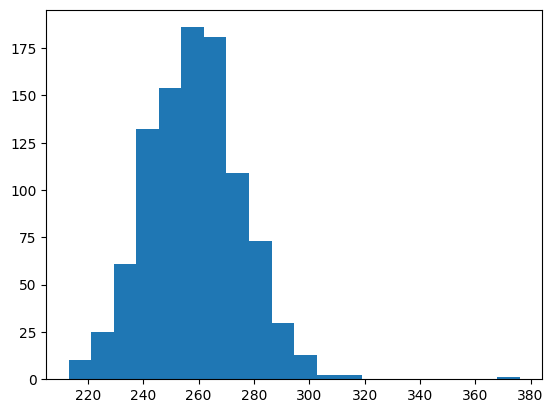

In [39]:
plt.hist(np.concatenate([ps[1][1:789],ps[1][790:]]),bins=20)

In [ ]:
## Extra DS trial

res = np.array([ 34.2,  33.9,  29.,   33.8 , 35.2 , 37.2 , 39.8 , 41.4 , 49.8 , 66.7 , 73.3 , 63.3
,  49.7 , 52.9 ,126.9, 140.2 ,108.3 , 58.1 , 56.1 ,115.7 ,186.3, 206.4 ,149.7 , 74.1
,  54.3 ,131.2 ,230.9, 270.3, 197.,   89.4 , 44.6, 119.9, 228.,  269.9,  93.1 , 36.8,
  92.3, 205.1 ,166.5 , 86.7,  36.2,  65.4, 156.,  128.4,  69.2,  36.7,  54.5,  79.8,
  88.1 , 80.4 , 52.8 , 38.,   42.1,  47.9,  43.8 , 39. ,  36.4,  34.7,  42.5,  38.1,
  40.2])
distance = np.array([2.5 ,2.6 ,2.7, 2.8, 2.9, 3. , 3.1 ,3.2 ,3.3, 3.4 ,3.5, 3.6 ,3.7 ,3.8 ,4.,  4.1 ,4.2 ,4.3,
 4.4 ,4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1 ,5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.1, 6.2,
 6.3 ,6.4 ,6.6, 6.7 ,6.8, 6.9, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1 ,8.2,
 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])
plt.plot(distance,res)
plt.grid('on')